In [5]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [6]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [7]:
# sparsification
sparse = True
subset_size = 0.8

if sparse:
    # directory where to save stuff
    in_dir = "./sparse"
    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000, 3000]
    # optimizer type
    optimizers = ["L-BFGS-B", "TNC", "SLSQP"]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800, 1500, 2000]
    # optimizer type
    optimizers = ["L-BFGS-B", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
list_f_vals = [1, 5, 20, 50]

# optimizer type
iters_per_optimmizer = 10

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [8]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [9]:
data.head(5)

,f,d,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,max_mse,min_mse,mean_tic,max_tic,min_tic
0,1,200,L-BFGS-B,"[0.031910773, 0.008578243, 0.35803223, 0.00176...","[0.7167969, 0.41970825, 1.5777662, 0.12620875,...","[nan, nan, nan, 0.15608384, 0.1444706, 0.14197...","[0.0, 0.0, 0.0, 1.0, 0.9158, 0.3942, 0.0, 0.0,...",0.07707199,0.35803223,0.0017625274,0.24365,1.0,0.0
1,1,200,TNC,"[0.010487624, 0.03718936, 0.060006876, 0.02295...","[0.2521496, 0.45770788, 0.5009033, 0.3476221, ...","[nan, nan, nan, 0.17316106, nan, nan, 0.137122...","[0.0, 0.0, 0.0, 0.3232, 0.0, 0.0, 0.5574, 0.99...",0.05832508,0.27600965,0.0026024156,0.30051,0.9948,0.0
2,1,200,SLSQP,"[0.08811152, 0.006443233, 0.13422523, 0.003643...","[0.5199822, 0.24632227, 0.6863449, 0.21807551,...","[nan, 0.15165348, nan, nan, nan, nan, nan, nan...","[0.0, 0.93899995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.16743448,1.3582435,0.0036436873,0.16362,0.93899995,0.0
3,1,400,L-BFGS-B,"[0.06949162, 0.06517972, 0.022597896, 0.023694...","[0.3999849, 0.70917964, 0.36640322, 0.36849737...","[nan, nan, nan, 0.12078762, nan, nan, nan, nan...","[0.0, 0.0, 0.0, 0.4869, 0.0, 0.0, 0.0, 0.0, 0....",0.4491553,3.9977722,0.01239539,0.048690002,0.4869,0.0
4,1,400,TNC,"[0.0014649181, 0.01165224, 0.12071434, 0.04839...","[0.109752476, 0.28957832, 0.85576177, 0.412912...","[nan, nan, nan, 0.12829404, 1.067798, nan, nan...","[0.0, 0.0, 0.0, 0.0067, 0.0477, 0.0, 0.0, 0.00...",46.822186,467.7516,0.0014649181,0.00625,0.0477,0.0


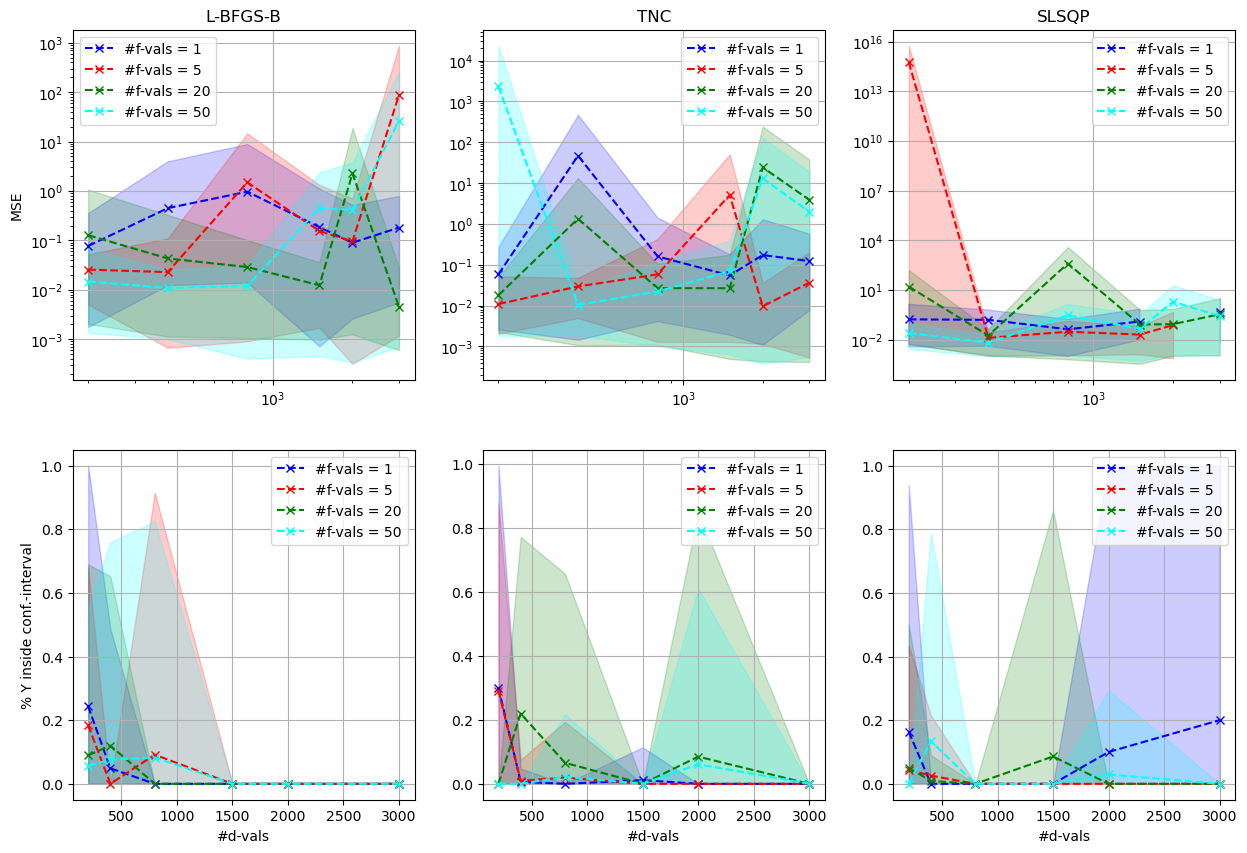

In [11]:
colors = ["b", "r", "g", "cyan"]

if sparse:
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
else:
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        mean_mse = temp["mean_mse"]
        min_mse = temp["min_mse"]
        max_mse = temp["max_mse"]
        ax[0,i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[0,i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
        ax[0,i].set_yscale("log")
        ax[0,i].set_xscale("log")

        mean_tic = temp["mean_tic"]
        min_tic = temp["min_tic"]
        max_tic = temp["max_tic"]
        ax[1,i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[1,i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


    ax[0,i].grid()
    ax[1,i].grid()
    ax[0,i].legend()
    ax[1,i].legend()
    ax[1,i].set_xlabel("#d-vals")
    ax[0,0].set_ylabel("MSE")
    ax[1,0].set_ylabel("% Y inside conf.-interval")
    ax[0,i].set_title(optimizer)